<a href="https://colab.research.google.com/github/firarru/TA/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url2020 = 'https://raw.githubusercontent.com/firarru/TA/refs/heads/main/Data/2020.csv'
url2021 = 'https://raw.githubusercontent.com/firarru/TA/refs/heads/main/Data/2021.csv'

df20 = pd.read_csv(url2020, sep=';')
df21 = pd.read_csv(url2021, sep=';')

/tmp/ipython-input-3864618148.py:4: DtypeWarning: Columns (11,12,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df20 = pd.read_csv(url2020, sep=';')
/tmp/ipython-input-3864618148.py:5: DtypeWarning: Columns (12,13,14,15,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv(url2021, sep=';')


In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_STAMP   61474 non-null  object 
 1   ASSET_ID     61474 non-null  int64  
 2   PRESSURE     61474 non-null  object 
 3   TEMPERATURE  61474 non-null  object 
 4   ENERGY_RATE  61474 non-null  object 
 5   VOLUME_RATE  61474 non-null  object 
 6   C1           0 non-null      float64
 7   C2           61474 non-null  object 
 8   C3           61474 non-null  object 
 9   IC4          61474 non-null  object 
 10  NC4          61474 non-null  object 
 11  IC5          61474 non-null  object 
 12  NC5          61474 non-null  object 
 13  C6           61474 non-null  object 
 14  C7           61474 non-null  object 
 15  C8           61474 non-null  object 
 16  C9           61474 non-null  object 
 17  N2           61474 non-null  object 
 18  CO2          61474 non-null  object 
 19  H2O 

In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61313 entries, 0 to 61312
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_STAMP   61313 non-null  object 
 1   ASSET_ID     61313 non-null  int64  
 2   PRESSURE     61313 non-null  object 
 3   TEMPERATURE  61313 non-null  object 
 4   ENERGY_RATE  61313 non-null  object 
 5   VOLUME_RATE  61313 non-null  object 
 6   C1           0 non-null      float64
 7   C2           61313 non-null  object 
 8   C3           61313 non-null  object 
 9   IC4          61313 non-null  object 
 10  NC4          61313 non-null  object 
 11  IC5          61313 non-null  object 
 12  NC5          61313 non-null  object 
 13  C6           61313 non-null  object 
 14  C7           61313 non-null  object 
 15  C8           61313 non-null  object 
 16  C9           61313 non-null  object 
 17  N2           61313 non-null  object 
 18  CO2          61313 non-null  object 
 19  H2O 

In [ ]:
df20.drop(columns=['C1','HCDP'], inplace=True)
df21.drop(columns=['C1','HCDP'], inplace=True)

In [ ]:
df20['DATE_STAMP'] = pd.to_datetime(df20['DATE_STAMP'], errors='coerce')
df21['DATE_STAMP'] = pd.to_datetime(df21['DATE_STAMP'], errors='coerce')

In [ ]:
df = pd.concat([df20, df21], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122787 entries, 0 to 122786
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_STAMP   122787 non-null  datetime64[ns]
 1   ASSET_ID     122787 non-null  int64         
 2   PRESSURE     122787 non-null  object        
 3   TEMPERATURE  122787 non-null  object        
 4   ENERGY_RATE  122787 non-null  object        
 5   VOLUME_RATE  122787 non-null  object        
 6   C2           122787 non-null  object        
 7   C3           122787 non-null  object        
 8   IC4          122787 non-null  object        
 9   NC4          122787 non-null  object        
 10  IC5          122787 non-null  object        
 11  NC5          122787 non-null  object        
 12  C6           122787 non-null  object        
 13  C7           122787 non-null  object        
 14  C8           122787 non-null  object        
 15  C9           122787 non-null  obje

In [ ]:
df['Year'] = df['DATE_STAMP'].dt.year
df['Month'] = df['DATE_STAMP'].dt.month
df['Day'] = df['DATE_STAMP'].dt.day

In [ ]:
df

,DATE_STAMP,ASSET_ID,PRESSURE,TEMPERATURE,ENERGY_RATE,VOLUME_RATE,C2,C3,IC4,NC4,...,C6,C7,C8,C9,N2,CO2,H2O,Year,Month,Day
0,2019-08-01 01:00:00,133001,14.517.578.125,998.828.125,12.577.816.772.460.900,11.544.931.793.212.800,53.047.008.514.404.200,13.537.909.984.588.600,0.43645539879798889,0.32078948616981506,...,0.13726329803466797,0.072187356650829315,0.017096299678087234,0.0014136940008029342,0.18879610300064087,18.426.729.440.689.000,0.021652,2019,8,1
1,2019-08-01 01:00:00,133070,57.998.345.947.265.600,701.334.228.515.625,22.086.972.045.898.400,20.386.820.983.886.700,40.502.729.415.893.500,18.676.921.129.226.600,0.63757425546646118,0.43791347742080688,...,0.052651796489953995,0.027175700291991234,0.0058046546764671803,0.0011127421166747808,0.4609401524066925,17.144.795.656.204.200,0.023172,2019,8,1
2,2019-08-01 01:00:00,133004,14.522.537.841.796.800,88.786.529.541.015.600,35.391.658.782.958.900,35.160.511.016.845.700,0.35351377725601196,0.1267065703868866,0.079962827265262604,0.011465017683804035,...,0.00097288988763466477,0.0005347132682800293,0.00037611369043588638,0.00041042148950509727,0.28160208463668823,11.915.068.626.403.800,0.031738,2019,8,1
3,2019-08-01 01:00:00,133003,13.764.019.775.390.600,69.951.560.974.121.000,94.693.527.221.679.600,85.420.654.296.875,54.100.861.549.377.400,28.812.408.447.265.600,0.92682808637619019,0.64454084634780884,...,0.0011219492880627513,0.0021899009589105844,0,0.0013049410190433264,0.59806996583938599,20.923.402.309.417.700,0.00442,2019,8,1
4,2019-08-01 01:00:00,133002,144.317.626.953.125,10.549.763.488.769.500,14.397.786.140.441.800,12.521.489.143.371.500,80.482.807.159.423.800,28.396.599.292.755.100,0.86996108293533325,0.7696460485458374,...,0.15951399505138397,0.068901002407073975,0.013945001177489758,0,0.96386104822158813,12.300.390.005.111.600,0.0,2019,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122782,2021-07-31 23:00:00,133060,98.822.802.734.375,85.072.105.407.714.800,21.649.917.602.539.000,20.198.715.209.960.900,39.159.979.820.251.400,15.278.489.589.691.100,0.50782090425491333,0.31940677762031555,...,0.055132921785116196,0.030361898243427277,0.008115,0.002706,0.37366387248039246,1.846.113.920.211.790,0.020102,2021,7,31
122783,2021-07-31 23:00:00,133004,133.897.314.453.125,85.680.320.739.746.000,65.091.812.133.789.000,64.628.890.991.210.900,0.55386000871658325,0.2441290020942688,0.18608500063419342,0.025496700778603554,...,0.0019500399939715862,0.0041163000278174877,0.000819,0.00189,0.38844001293182373,17.415.499.687.194.800,0.004836,2021,7,31
122784,2021-07-31 23:00:00,133070,5.792.681.884.765.620,81.789.405.822.753.900,21.649.917.602.539.000,20.198.715.209.960.900,39.159.979.820.251.400,15.278.489.589.691.100,0.50782090425491333,0.31940677762031555,...,0.055132921785116196,0.030361898243427277,0.008115,0.002706,0.37366387248039246,1.846.113.920.211.790,0.020102,2021,7,31
122785,2021-07-31 23:00:00,133002,1.324.988.037.109.370,11.166.632.080.078.100,14.010.550.498.962.400,12.451.809.883.117.600,49.919.538.497.924.800,1.958.440.899.848.930,0.70773994922637939,0.56932097673416138,...,0.20549198985099792,0.11824899166822433,0.056804,0.011967,0.74590092897415161,10.155.019.760.131.800,0.0,2021,7,31


In [ ]:
df['DATE_STAMP'] = pd.to_datetime(df['DATE_STAMP'])

df_filter = df.loc[
    (df['DATE_STAMP'] >= '2020-06-01 00:00:00') &
    (df['DATE_STAMP'] <= '2021-06-30 23:00:00')
].reset_index(drop=True)

In [ ]:
df_filter

,DATE_STAMP,ASSET_ID,PRESSURE,TEMPERATURE,ENERGY_RATE,VOLUME_RATE,C2,C3,IC4,NC4,...,C6,C7,C8,C9,N2,CO2,H2O,Year,Month,Day
0,2020-06-01 00:00:00,133071,58.910.308.837.890.600,7.603.485.107.421.870,69.633.010.864.257.800,63.608.913.421.630.800,49.105.286.598.205.500,2.210.094.690.322.870,0.69307106733322144,0.51719671487808228,...,0.051481612026691437,0.026815630495548248,0.0070028584450483322,0.004081,0.42557963728904724,23.132.209.777.832.000,0.016298,2020,6,1
1,2020-06-01 00:00:00,133004,15.661.116.943.359.300,97.161.773.681.640.600,70.479.591.369.628.900,70.140.121.459.960.900,0.3761136531829834,0.1347341388463974,0.086355805397033691,0.011913193389773369,...,0.0011321421479806304,0.00067220587516203523,0.00035026928526349366,0.000441,0.32227146625518799,1.386.163.592.338.560,0.012741,2020,6,1
2,2020-06-01 00:00:00,133002,15.512.724.609.375,11.593.182.373.046.800,11.808.169.364.929.100,10.443.270.683.288.500,70.951.199.531.555.100,21.265.618.801.116.900,0.76694202423095703,0.52438801527023315,...,0.16570599377155304,0.084074996411800385,0.037955000996589661,0.00744,0.68995702266693115,18.290.899.991.989.100,0.0,2020,6,1
3,2020-06-01 00:00:00,133003,1.500.152.587.890.620,83.022.186.279.296.800,11.177.316.284.179.600,98.254.928.588.867.100,64.323.363.304.138.100,36.602.327.823.638.900,11.410.282.850.265.500,0.80928927659988403,...,0,0,0,0.000084,0.60061448812484741,19.861.854.314.804.000,0.0005,2020,6,1
4,2020-06-01 00:00:00,133060,12.791.077.880.859.300,85.192.268.371.582.000,2.559.383.544.921.870,23.424.996.948.242.100,47.872.657.775.878.900,2.154.813.289.642.330,0.66601628065109253,0.49721524119377136,...,0.05724726989865303,0.027909206226468086,0.0065213469788432121,0.002445,0.40506243705749512,22.691.197.395.324.700,0.01,2020,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66341,2021-06-30 23:00:00,133004,14.935.035.400.390.600,89.757.492.065.429.600,62.746.540.069.580.000,62.400.749.206.542.900,0.49970179796218872,0.20894619822502136,0.15167249739170074,0.020780129358172417,...,0.0015358920209109783,0.00087550911121070385,0.00042,0.000243,0.37020125985145569,1.679.610.013.961.790,0.012824,2021,6,30
66342,2021-06-30 23:00:00,133070,57.954.241.943.359.300,77.309.928.894.042.900,23.430.117.797.851.500,21.762.696.838.378.900,38.675.539.493.560.700,17.707.365.751.266.400,0.59790533781051636,0.44400563836097717,...,0.043386466801166534,0.023559363558888435,0.006966,0.002972,0.39616507291793823,20.781.412.124.633.700,0.019683,2021,6,30
66343,2021-06-30 23:00:00,133003,14.158.846.435.546.800,74.194.602.966.308.500,89.789.039.611.816.400,81.341.438.293.457.000,48.597.006.797.790.500,27.547.781.467.437.700,0.88844484090805054,0.65408015251159668,...,0.0014589111087843776,0.003143808338791132,0.000601,0.001663,0.50129139423370361,19.898.346.662.521.300,0.005002,2021,6,30
66344,2021-06-30 23:00:00,133071,5.889.481.201.171.870,78.107.688.903.808.500,62.691.749.572.753.900,58.023.502.349.853.500,38.755.204.677.581.700,18.560.054.302.215.500,0.64913296699523926,0.49833685159683228,...,0.039795845746994019,0.024211037904024124,0.007603,0.003527,0.40161469578742981,20.590.300.559.997.500,0.020487,2021,6,30


In [ ]:
df = df[df['Year'] == 2021]
df

,DATE_STAMP,ASSET_ID,PRESSURE,TEMPERATURE,ENERGY_RATE,VOLUME_RATE,C2,C3,IC4,NC4,...,C6,C7,C8,C9,N2,CO2,H2O,Year,Month,Day
87171,2021-01-01 00:00:00,133071,59.047.406.005.859.300,72.550.064.086.914.000,47.318.618.774.414.000,43.688.224.792.480.400,42.584.714.889.526.300,1.927.398.681.640.620,0.59587454795837402,0.45817315578460693,...,0.045918,0.024116,0.0064215725287795067,0.0040860921144485474,0.39649787545204163,21.249.117.851.257.300,0.022218953818082809,2021,1,1
87172,2021-01-01 00:00:00,133001,0,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,2021,1,1
87173,2021-01-01 00:00:00,133060,1.203.593.505.859.370,82.889.106.750.488.200,29.292.205.810.546.800,27.089.749.145.507.800,42.480.478.286.743.100,1.901.361.346.244.810,0.57145595550537109,0.44615915417671204,...,0.050664,0.01904,0.0042240852490067482,0.0025034581776708364,0.39919233322143555,21.227.905.750.274.600,0.021706324070692062,2021,1,1
87174,2021-01-01 00:00:00,133002,15.240.791.015.625,1.299.427.490.234.370,21.987.785.339.355.400,19.706.693.649.291.900,51.179.838.180.541.900,19.667.789.936.065.600,0.61904501914978027,0.54902797937393188,...,0.162244,0.079006,0.029624000191688538,0.0071499999612569809,0.77837902307510376,10.585.759.878.158.500,0,2021,1,1
87175,2021-01-01 00:00:00,133004,15.414.215.087.890.600,87.276.268.005.371.000,53.233.055.114.746.000,52.953.498.840.332.000,0.47228002548217773,0.20034465193748474,0.13875110447406769,0.018289089202880859,...,0.001457,0.000828,0.0004832401464227587,0.0002234811254311353,0.37313565611839294,16.211.792.230.606.000,0.019027000293135643,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122782,2021-07-31 23:00:00,133060,98.822.802.734.375,85.072.105.407.714.800,21.649.917.602.539.000,20.198.715.209.960.900,39.159.979.820.251.400,15.278.489.589.691.100,0.50782090425491333,0.31940677762031555,...,0.055132921785116196,0.030361898243427277,0.008115,0.002706,0.37366387248039246,1.846.113.920.211.790,0.020102,2021,7,31
122783,2021-07-31 23:00:00,133004,133.897.314.453.125,85.680.320.739.746.000,65.091.812.133.789.000,64.628.890.991.210.900,0.55386000871658325,0.2441290020942688,0.18608500063419342,0.025496700778603554,...,0.0019500399939715862,0.0041163000278174877,0.000819,0.00189,0.38844001293182373,17.415.499.687.194.800,0.004836,2021,7,31
122784,2021-07-31 23:00:00,133070,5.792.681.884.765.620,81.789.405.822.753.900,21.649.917.602.539.000,20.198.715.209.960.900,39.159.979.820.251.400,15.278.489.589.691.100,0.50782090425491333,0.31940677762031555,...,0.055132921785116196,0.030361898243427277,0.008115,0.002706,0.37366387248039246,1.846.113.920.211.790,0.020102,2021,7,31
122785,2021-07-31 23:00:00,133002,1.324.988.037.109.370,11.166.632.080.078.100,14.010.550.498.962.400,12.451.809.883.117.600,49.919.538.497.924.800,1.958.440.899.848.930,0.70773994922637939,0.56932097673416138,...,0.20549198985099792,0.11824899166822433,0.056804,0.011967,0.74590092897415161,10.155.019.760.131.800,0.0,2021,7,31


In [ ]:
df = df[df['Month'] != 7]

In [ ]:
df

,DATE_STAMP,ASSET_ID,PRESSURE,TEMPERATURE,ENERGY_RATE,VOLUME_RATE,C2,C3,IC4,NC4,...,C6,C7,C8,C9,N2,CO2,H2O,Year,Month,Day
87171,2021-01-01 00:00:00,133071,59.047.406.005.859.300,72.550.064.086.914.000,47.318.618.774.414.000,43.688.224.792.480.400,42.584.714.889.526.300,1.927.398.681.640.620,0.59587454795837402,0.45817315578460693,...,0.045918,0.024116,0.0064215725287795067,0.0040860921144485474,0.39649787545204163,21.249.117.851.257.300,0.022218953818082809,2021,1,1
87172,2021-01-01 00:00:00,133001,0,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,2021,1,1
87173,2021-01-01 00:00:00,133060,1.203.593.505.859.370,82.889.106.750.488.200,29.292.205.810.546.800,27.089.749.145.507.800,42.480.478.286.743.100,1.901.361.346.244.810,0.57145595550537109,0.44615915417671204,...,0.050664,0.01904,0.0042240852490067482,0.0025034581776708364,0.39919233322143555,21.227.905.750.274.600,0.021706324070692062,2021,1,1
87174,2021-01-01 00:00:00,133002,15.240.791.015.625,1.299.427.490.234.370,21.987.785.339.355.400,19.706.693.649.291.900,51.179.838.180.541.900,19.667.789.936.065.600,0.61904501914978027,0.54902797937393188,...,0.162244,0.079006,0.029624000191688538,0.0071499999612569809,0.77837902307510376,10.585.759.878.158.500,0,2021,1,1
87175,2021-01-01 00:00:00,133004,15.414.215.087.890.600,87.276.268.005.371.000,53.233.055.114.746.000,52.953.498.840.332.000,0.47228002548217773,0.20034465193748474,0.13875110447406769,0.018289089202880859,...,0.001457,0.000828,0.0004832401464227587,0.0002234811254311353,0.37313565611839294,16.211.792.230.606.000,0.019027000293135643,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117574,2021-06-30 23:00:00,133004,14.935.035.400.390.600,89.757.492.065.429.600,62.746.540.069.580.000,62.400.749.206.542.900,0.49970179796218872,0.20894619822502136,0.15167249739170074,0.020780129358172417,...,0.0015358920209109783,0.00087550911121070385,0.00042,0.000243,0.37020125985145569,1.679.610.013.961.790,0.012824,2021,6,30
117575,2021-06-30 23:00:00,133070,57.954.241.943.359.300,77.309.928.894.042.900,23.430.117.797.851.500,21.762.696.838.378.900,38.675.539.493.560.700,17.707.365.751.266.400,0.59790533781051636,0.44400563836097717,...,0.043386466801166534,0.023559363558888435,0.006966,0.002972,0.39616507291793823,20.781.412.124.633.700,0.019683,2021,6,30
117576,2021-06-30 23:00:00,133003,14.158.846.435.546.800,74.194.602.966.308.500,89.789.039.611.816.400,81.341.438.293.457.000,48.597.006.797.790.500,27.547.781.467.437.700,0.88844484090805054,0.65408015251159668,...,0.0014589111087843776,0.003143808338791132,0.000601,0.001663,0.50129139423370361,19.898.346.662.521.300,0.005002,2021,6,30
117577,2021-06-30 23:00:00,133071,5.889.481.201.171.870,78.107.688.903.808.500,62.691.749.572.753.900,58.023.502.349.853.500,38.755.204.677.581.700,18.560.054.302.215.500,0.64913296699523926,0.49833685159683228,...,0.039795845746994019,0.024211037904024124,0.007603,0.003527,0.40161469578742981,20.590.300.559.997.500,0.020487,2021,6,30


In [ ]:
df[df['ASSET_ID'] == 133004]

,DATE_STAMP,ASSET_ID,PRESSURE,TEMPERATURE,ENERGY_RATE,VOLUME_RATE,C2,C3,IC4,NC4,...,C6,C7,C8,C9,N2,CO2,H2O,Year,Month,Day
87175,2021-01-01 00:00:00,133004,15.414.215.087.890.600,87.276.268.005.371.000,53.233.055.114.746.000,52.953.498.840.332.000,0.47228002548217773,0.20034465193748474,0.13875110447406769,0.018289089202880859,...,0.001457,0.000828,0.0004832401464227587,0.0002234811254311353,0.37313565611839294,16.211.792.230.606.000,0.019027000293135643,2021,1,1
87182,2021-01-01 01:00:00,133004,15.305.687.255.859.300,874.453.125,62.959.041.595.458.900,62.624.782.562.255.800,0.47019901871681213,0.19849681854248047,0.13792127370834351,0.018181266263127327,...,0.001438,0.000807,0.00028396878042258322,0,0.370147705078125,16.090.320.348.739.600,0.019027000293135643,2021,1,1
87189,2021-01-01 02:00:00,133004,15.219.527.587.890.600,8.731.201.171.875,63.225.444.793.701.100,62.891.632.080.078.100,0.47226077318191528,0.20121942460536957,0.13919803500175476,0.018322363495826721,...,0.001452,0.000822,0.00028300235862843692,0.00024257673067040741,0.37327784299850464,16.198.587.417.602.500,0.019027000293135643,2021,1,1
87192,2021-01-01 03:00:00,133004,15.146.988.525.390.600,867.568.359.375,63.337.451.934.814.400,63.004.669.189.453.100,0.47256448864936829,0.20130033791065216,0.13937763869762421,0.018353763967752457,...,0.001434,0.000816,0.00029487628489732742,0,0.37571355700492859,16.194.618.940.353.300,0.019027000293135643,2021,1,1
87199,2021-01-01 04:00:00,133004,15.070.633.544.921.800,86.440.361.022.949.200,62.544.933.319.091.700,62.209.640.502.929.600,0.47059017419815063,0.19966001808643341,0.13847276568412781,0.018236700445413589,...,0.001458,0.000811,0.00045147715718485415,0.0001502607628935948,0.36793422698974609,16.116.529.703.140.200,0.019027000293135643,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117545,2021-06-30 19:00:00,133004,1.496.221.923.828.120,90.263.603.210.449.200,62.731.105.804.443.300,62.382.396.697.998.000,0.49945595860481262,0.21328839659690857,0.15322588384151459,0.020886044949293137,...,0.0015099340816959739,0.00084112357581034303,0.000289,0.000157,0.37137028574943542,1.682.889.461.517.330,0.013118,2021,6,30
117553,2021-06-30 20:00:00,133004,149.476.171.875,89.826.118.469.238.200,62.394.268.035.888.600,62.046.333.312.988.200,0.50074714422225952,0.20974746346473694,0.15212523937225342,0.020820712670683861,...,0.0015200935304164886,0.00085195217980071902,0.000519,0.001057,0.37113359570503235,16.804.839.372.634.800,0.012903,2021,6,30
117562,2021-06-30 21:00:00,133004,14.939.163.818.359.300,89.722.198.486.328.100,61.661.262.512.207.000,61.318.531.036.376.900,0.50073963403701782,0.20997072756290436,0.15235254168510437,0.020874330773949623,...,0.0015225813258439302,0.00090904673561453819,0.000519,0.000452,0.37119379639625549,16.801.586.151.123.000,0.012798,2021,6,30
117566,2021-06-30 22:00:00,133004,1.493.621.826.171.870,899.014.892.578.125,62.952.568.054.199.200,62.604.743.957.519.500,0.5002174973487854,0.20948423445224762,0.15197727084159851,0.02082313597202301,...,0.0015104516642168164,0.00086037657456472516,0.000454,0.00046,0.37068653106689453,16.809.923.648.834.200,0.012941,2021,6,30


# Task
The task is to clean and convert specified numerical columns in the DataFrame `df` (['PRESSURE', 'TEMPERATURE', 'ENERGY_RATE', 'VOLUME_RATE', 'C2', 'C3', 'IC4', 'NC4', 'IC5', 'NC5', 'C6', 'C7', 'C8', 'C9', 'N2', 'CO2']) from 'object' to 'float' type by first removing the thousand separators ('.'). After cleaning and converting these columns, filter the DataFrame to include only `ASSET_ID`s [133001, 133002, 133003, 133004, 133060], map these IDs to descriptive names (Anoa, Kakap, Hang Tuah, GajahBaru, ORF), calculate the average `VOLUME_RATE` for each source asset, and then create and visualize a directed network graph where source assets connect to 'ORF' with edge weights representing these average volume rates.

## Membersihkan dan Mengubah Tipe Data Kolom Numerik

### Subtask:
Mengubah kolom-kolom yang seharusnya numerik tetapi bertipe 'object' (seperti 'PRESSURE', 'TEMPERATURE', 'ENERGY_RATE', 'VOLUME_RATE', dan 'C2' hingga 'CO2') menjadi tipe data numerik (float) dengan menghapus pemisah ribuan (titik) yang mengganggu.


**Reasoning**:
The previous attempt to convert 'VOLUME_RATE' to float failed due to the presence of '.' as a thousand separator. I need to iterate through all specified columns, remove the '.' characters, and then convert them to float type to correctly handle the numeric data.



In [ ]:
columns_to_convert = ['PRESSURE', 'TEMPERATURE', 'ENERGY_RATE', 'VOLUME_RATE', 'C2', 'C3', 'IC4', 'NC4', 'IC5', 'NC5', 'C6', 'C7', 'C8', 'C9', 'N2', 'CO2']

for col in columns_to_convert:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False)
    df[col] = df[col].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_STAMP   61474 non-null  datetime64[ns]
 1   ASSET_ID     61474 non-null  int64         
 2   PRESSURE     61474 non-null  float64       
 3   TEMPERATURE  61474 non-null  float64       
 4   ENERGY_RATE  61474 non-null  float64       
 5   VOLUME_RATE  61474 non-null  float64       
 6   C2           61474 non-null  float64       
 7   C3           61474 non-null  float64       
 8   IC4          61474 non-null  float64       
 9   NC4          61474 non-null  float64       
 10  IC5          61474 non-null  float64       
 11  NC5          61474 non-null  float64       
 12  C6           61474 non-null  float64       
 13  C7           61474 non-null  float64       
 14  C8           61474 non-null  float64       
 15  C9           61474 non-null  float64       
 16  N2  

## Memfilter dan Memetakan Data Asset

### Subtask:
Filter the DataFrame to include only specific ASSET_IDs and map these IDs to descriptive names.


**Reasoning**:
The subtask requires filtering the DataFrame by specific ASSET_IDs and then mapping these IDs to descriptive names. The next step defines the target ASSET_IDs, filters the DataFrame, creates a mapping dictionary, and applies this mapping to create a new 'ASSET_NAME' column.



In [ ]:
target_asset_ids = [133001, 133002, 133003, 133004, 133060]
df_filtered = df[df['ASSET_ID'].isin(target_asset_ids)].copy()

asset_id_to_name = {
    133001: 'Anoa',
    133002: 'Kakap',
    133003: 'Hang Tuah',
    133004: 'GajahBaru',
    133060: 'ORF'
}

df_filtered['ASSET_NAME'] = df_filtered['ASSET_ID'].map(asset_id_to_name)
df_filtered.head()

,DATE_STAMP,ASSET_ID,PRESSURE,TEMPERATURE,ENERGY_RATE,VOLUME_RATE,C2,C3,IC4,NC4,IC5,NC5,C6,C7,C8,C9,N2,CO2,H2O,ASSET_NAME
0,2019-08-01 01:00:00,133001,1.451758e+11,9.988281e+09,1.257782e+30,1.154493e+30,5.304701e+30,1.353791e+30,4.364554e+31,3.207895e+32,2.034409e+32,1.163768e+32,1.372633e+32,7.218736e+31,1.709630e+32,1.413694e+32,1.887961e+31,1.842673e+29,0.021652,Anoa
2,2019-08-01 01:00:00,133004,1.452254e+30,8.878653e+30,3.539166e+30,3.516051e+30,3.535138e+32,1.267066e+16,7.996283e+31,1.146502e+32,1.769094e+32,3.110465e+31,9.728899e+31,5.347133e+16,3.761137e+31,4.104215e+31,2.816021e+32,1.191507e+30,0.031738,GajahBaru
3,2019-08-01 01:00:00,133003,1.376402e+30,6.995156e+29,9.469353e+30,8.542065e+14,5.410086e+30,2.881241e+30,9.268281e+31,6.445408e+31,6.498706e+31,0.000000e+00,1.121949e+32,2.189901e+32,0.000000e+00,1.304941e+32,5.980700e+30,2.092340e+30,0.004420,Hang Tuah
4,2019-08-01 01:00:00,133002,1.443176e+15,1.054976e+30,1.439779e+30,1.252149e+30,8.048281e+30,2.839660e+30,8.699611e+31,7.696460e+16,3.184740e+32,2.113360e+32,1.595140e+32,6.890100e+32,1.394500e+32,0.000000e+00,9.638610e+31,1.230039e+30,0.000000,Kakap
6,2019-08-01 01:00:00,133060,1.170607e+16,8.518368e+30,2.208697e+30,2.038682e+30,4.050273e+30,1.867692e+30,6.375743e+31,4.379135e+31,8.220495e+31,4.267211e+31,5.265180e+31,2.717570e+31,5.804655e+30,1.112742e+32,4.609402e+16,1.714480e+30,0.023172,ORF


**Reasoning**:
The next step is to calculate the average 'VOLUME_RATE' for each asset name, excluding 'ORF', as per the subtask requirements. This will provide the weights for the edges in the network graph.



In [ ]:
average_volume_rate = df_filtered[df_filtered['ASSET_NAME'] != 'ORF'].groupby('ASSET_NAME')['VOLUME_RATE'].mean().reset_index()
print(average_volume_rate)


  ASSET_NAME   VOLUME_RATE
0       Anoa  2.660103e+30
1  GajahBaru  4.833543e+30
2  Hang Tuah  3.067839e+30
3      Kakap  2.188576e+30


**Reasoning**:
The next logical step is to create a directed network graph. This involves initializing a graph object, adding nodes for the source assets and 'ORF', and then adding edges from each source asset to 'ORF' using the calculated `average_volume_rate` as edge weights. This prepares the data for visualization.



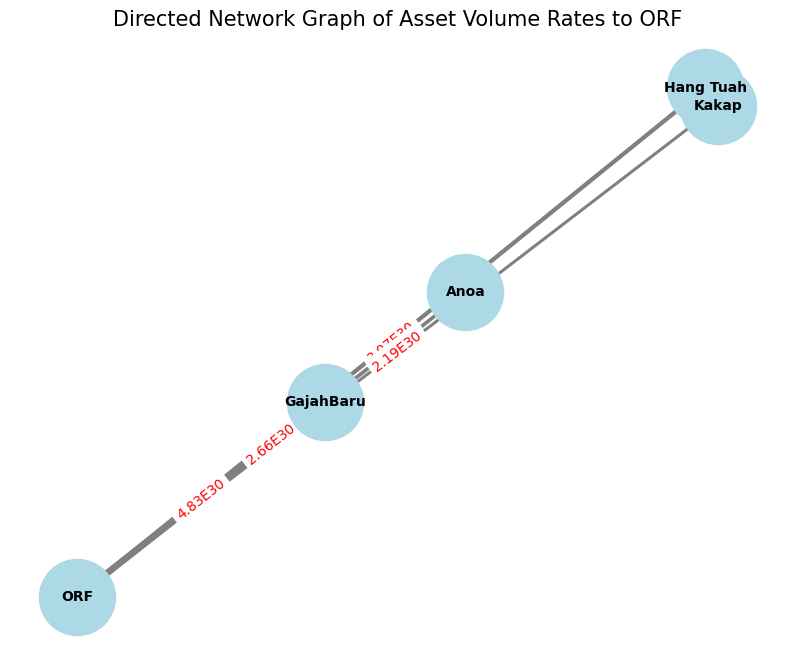

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

source_assets = average_volume_rate['ASSET_NAME'].tolist()
destination_asset = 'ORF'

# Add nodes for source assets and the destination asset
G.add_nodes_from(source_assets)
G.add_node(destination_asset)

# Add edges from each source asset to 'ORF' with 'VOLUME_RATE' as weight
for _, row in average_volume_rate.iterrows():
    source = row['ASSET_NAME']
    weight = row['VOLUME_RATE']
    G.add_edge(source, destination_asset, weight=weight)

# Prepare labels and sizes for plotting
pos = nx.spring_layout(G, k=0.5, iterations=50)
edges = G.edges()
weights = [G[u][v]['weight']/1e30 for u,v in edges] # Scaling weights for better visualization

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, arrowsize=20, edge_color='gray')

edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels_scaled = {k: f'{v/1e30:.2f}E30' for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_scaled, font_color='red')

plt.title('Directed Network Graph of Asset Volume Rates to ORF', size=15)
plt.axis('off')
plt.show()


## Final Task

### Subtask:
Menyajikan visualisasi grafik jaringan dan menjelaskan hubungan serta aliran volume berdasarkan `VOLUME_RATE` antara node sumber dan node sink (ORF).


## Summary:

### Q&A
The directed network graph successfully visualizes the relationship and volume flow based on `VOLUME_RATE` between the source assets (Anoa, Kakap, Hang Tuah, GajahBaru) and the 'ORF' sink node. The edge weights and widths on the graph represent the average `VOLUME_RATE` from each source to 'ORF'.

### Data Analysis Key Findings
*   All specified numerical columns (`PRESSURE`, `TEMPERATURE`, `ENERGY_RATE`, `VOLUME_RATE`, `C2` to `CO2`) were successfully cleaned by removing thousand separators and converted from 'object' to 'float64' data type.
*   The DataFrame was filtered to include only `ASSET_ID`s 133001, 133002, 133003, 133004, and 133060. These `ASSET_ID`s were then mapped to descriptive names: 'Anoa', 'Kakap', 'Hang Tuah', 'GajahBaru', and 'ORF', respectively.
*   The average `VOLUME_RATE` was calculated for each source asset (Anoa, GajahBaru, Hang Tuah, Kakap), which provided the quantitative measure for the connections in the network graph.
*   A directed network graph was successfully generated and visualized, showing connections from the source assets (Anoa, Kakap, Hang Tuah, GajahBaru) to the 'ORF' node. The edges' widths and labels on the graph visually represent the average `VOLUME_RATE` flowing from each source asset to 'ORF', scaled for readability.

### Insights or Next Steps
*   The network graph provides a clear overview of the contribution of each source asset's average `VOLUME_RATE` to the 'ORF' destination, which can be useful for resource allocation or system optimization.
*   Future analysis could explore the variability or stability of these `VOLUME_RATE`s over time for each asset to identify potential operational risks or opportunities for improvement.
